In [1]:
## Homework 3
##
## simple MNIST classifier network
##
## NSC3270/5270 Spring 2019

import numpy as np
import matplotlib.pyplot as plt

# supress some unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# load, display, and format mnist images and labels

In [2]:
from tensorflow.keras.datasets import mnist

# load mnist images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# check dimensions and type of images and labels

print('train')
print(train_images.shape)
print(train_labels.shape)
print(type(train_images))
print(type(train_labels))
print()

print('test')
print(test_images.shape)
print(test_labels.shape)
print(type(test_images))
print(type(test_labels))

train
(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

test
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


There are 60,000 train images and 10,000 test images. Each image is 28x28 pixels (gray scale).

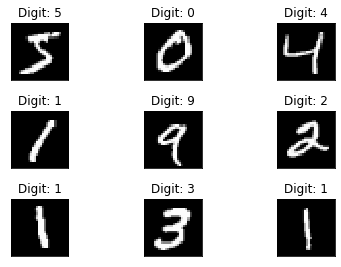

In [4]:
# display the first 9 digits

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)    # index starts at 1
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### reformat training and testing images

In [5]:
# check out (again) dimensions and types of mnist data
print('Training images shape: ', train_images.shape)
print('Training pixel type:   ', type(train_images[0][0][0]))
print('Testing images shape:  ', test_images.shape)
print('Testing pixel type:    ', type(test_images[0][0][0]))

Training images shape:  (60000, 28, 28)
Training pixel type:    <class 'numpy.uint8'>
Testing images shape:   (10000, 28, 28)
Testing pixel type:     <class 'numpy.uint8'>


In [6]:
# number of images
Ntr = train_images.shape[0] # 60000
Nts = test_images.shape[0]  # 10000

# image shape
szx = train_images.shape[1] # 28
szy = train_images.shape[2] # 28

# need to reshape the 28x28 training/testing images as vectors
train_images_vec = train_images.reshape((Ntr, szx * szy))
test_images_vec = test_images.reshape(  (Nts, szx * szy))

# deciding to normalize the pixels to 0..1 and recase as float32
train_images_vec = train_images_vec.astype('float32') / 255
test_images_vec = test_images_vec.astype('float32') / 255

# display new input dimensions/type
print('New training images shape: ', train_images_vec.shape)
print('New training pixel type:   ', type(train_images_vec[0][0]))
print('New testing images shape:  ', test_images_vec.shape)
print('New testing pixel type:    ', type(test_images_vec[0][0]))

New training images shape:  (60000, 784)
New training pixel type:    <class 'numpy.float32'>
New testing images shape:   (10000, 784)
New testing pixel type:     <class 'numpy.float32'>


### reformat training and testing labels

In [7]:
# check out dimensions and types of mnist data
print('Training labels shape: ', train_labels.shape)
print('Training labels type:  ', type(train_labels[0]))
print()

# check out what the first 9 labels look like
print("First 9 training labels as labels:\n", train_labels[:9])

Training labels shape:  (60000,)
Training labels type:   <class 'numpy.uint8'>

First 9 training labels as labels:
 [5 0 4 1 9 2 1 3 1]


In [8]:
from tensorflow.keras.utils import to_categorical

# also need to categorically encode the labels as "one hot"

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

print("First 9 training labels as one-hot encoded vectors:\n", train_labels_onehot[:9])

First 9 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
# display new output dimensions/type
print('New training labels shape (one hot): ', train_labels_onehot.shape)
print('New training labels type (one hot):  ', type(train_labels_onehot[0][0]))

New training labels shape (one hot):  (60000, 10)
New training labels type (one hot):   <class 'numpy.float32'>


# define and train neural network

In [10]:
# import tools for basic keras networks 
from tensorflow.keras import models
from tensorflow.keras import layers

nout = 10   # number of units in the output (activation) layer

# create architecture of simple neural network model
# input layer  : 28*28 = 784 input nodes
# output layer : 10 (nout) output nodes
network = models.Sequential()
network.add(layers.Dense(nout, 
                         activation='sigmoid', 
                         input_shape=(szx * szy,)))

# print a model summary
print(network.summary())
print()
for layer in network.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print()
for layer in network.layers:
    print(layer.get_config())
print()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None

layer name : dense | input shape : (None, 784) | output shape : (None, 10)

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 10, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}



In [11]:
# compile network
network.compile(optimizer='sgd', 
                loss='mean_squared_error', 
                metrics=['accuracy'])

# now train the network
history = network.fit(train_images_vec, 
                      train_labels_onehot, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=20, 
                      batch_size=128)
print('Done training!')
print()

Epoch 1/20
422/422 [==============================] - 0s 812us/step - loss: 0.1465 - accuracy: 0.1834 - val_loss: 0.1042 - val_accuracy: 0.2530
Epoch 2/20
422/422 [==============================] - 0s 739us/step - loss: 0.0965 - accuracy: 0.3234 - val_loss: 0.0905 - val_accuracy: 0.3965

In [12]:
# test network
test_loss, test_acc = network.evaluate(test_images_vec, 
                                       test_labels_onehot, 
                                       verbose=True)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 337us/step - loss: 0.0536 - accuracy: 0.7487
test_acc: 0.7487000226974487


# some pieces needed to complete Homework 3

In [13]:
# get learned network weights and biases

# the weight matrix is 784 by 10 because there's 784 input neurons and 10 output neurons
# bias is just 10 numbers, one for each output neuron
W = network.layers[0].get_weights()[0]     # weights input to hidden
B = network.layers[0].get_weights()[1]     # bias to hidden

print('W {} | B {}'.format(W.shape, B.shape))

W (784, 10) | B (10,)


In [14]:
# model predictions (all 10000 test images)
out = network.predict(test_images_vec)

# model predictions (a single test image)
example = test_images_vec[123]
print(example.shape)

# vector passed to network.predict must be (?, 784)
example = example.reshape((1,example.shape[0]))
print(example.shape)

(784,)
(1, 784)


In [15]:
#########################################################################################
##
## Homework 3 Solution Area
##

### INSERT Q1 SOLUTION HERE ###

def one_hot_to_labels(output):
    test_decisions = np.zeros(len(test_labels))
    for i in range(len(output)):
        winning_activation = 0
        for j in range(len(output[i])):
            if output[i][j] > winning_activation:
                winning_activation = output[i][j]
                test_decisions[i] = int(j)
    return test_decisions

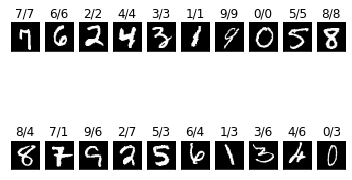

In [16]:
### INSERT Q2 SOLUTION HERE ###

# fill out the correct and incorrect numbers (starting from a random test_labels location)
def find_correct_and_incorrect(s, labels, decisions, num_outputs):
    correct_i = []
    correct_n = []
    incorrect_i = []
    incorrect_n = []
    while len(correct_i) < num_outputs or len(incorrect_i) < num_outputs:
        if labels[s] not in correct_n and labels[s] == int(decisions[s]):
            correct_i.append(s)
            correct_n.append(labels[s])
        if labels[s] not in incorrect_n and labels[s] != int(decisions[s]):
            incorrect_i.append(s)
            incorrect_n.append(labels[s])
        s += 1  # increment i
    return correct_i, incorrect_i

# given a list of correct and incorrect labels, show the corresponding images and answer given
def plot_correct_and_incorrect(correct_i, incorrect_i, num_outputs):
    for i in range(2*num_outputs):
        plt.subplot(2,num_outputs,i+1)
        idx = 0
        if i < num_outputs:
            idx = correct_i[i]
        else:
            idx = incorrect_i[i-num_outputs]
        plt.imshow(test_images[idx], cmap='gray', interpolation='none')
        plt.title("{}/{}".format(test_labels[idx], int(test_decisions[idx])))
        plt.xticks([])
        plt.yticks([])
    plt.show()

test_decisions = one_hot_to_labels(out)
(correct_indices, incorrect_indices) = find_correct_and_incorrect(80, test_labels, test_decisions, len(W[0]))
plot_correct_and_incorrect(correct_indices, incorrect_indices, len(W[0]))

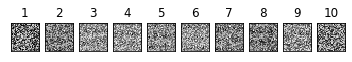

In [17]:
### INSERT Q3 SOLUTION HERE ###

def show_weight_images(num_outputs):
    weight_images = W.reshape(num_outputs, szx, szy)
    for i in range(num_outputs):
        plt.subplot(1, num_outputs, i+1)
        plt.imshow(weight_images[i], cmap='gray', interpolation='none')
        plt.title("{}".format(i+1))
        plt.xticks([])
        plt.yticks([])
    plt.show()

show_weight_images(len(W[0]))

In [18]:
### INSERT Q4 SOLUTION HERE ###

# compare 2D arrays for differences
def check_arrays(array, correct_array, epsilon):
    diff = array - correct_array
    # find all occurrences of differences greater than epsilon among the rows
    diffs_rows = np.where(np.abs(diff) > epsilon)[0]
    # find all occurrences of differences greater than epsilon among the columns
    diffs_cols = np.where(np.abs(diff) > epsilon)[1]
    if diffs_rows.size == 0 and diffs_cols.size == 0:
        print("no differences found")
    else:
        print("fail")

# apply the sigmoid activation function (from HW2)
def logistic_func_vectorized(n):
    return 1/(1+np.exp(-n))

# initialize outputs array with correct shape
outputs = np.empty((len(test_labels), len(W[0])))

for i in range(len(test_labels)):   # for each test image input
    inputs = test_images_vec[i].reshape(1, len(W[:,0])) # make shape compatible
    outputs[i] = logistic_func_vectorized(np.dot(inputs,W)+B)   # apply activation func

# check with the values produced by Keras (using epsilon of 0.0001)
check_arrays(outputs, out, 0.0001)

no differences found
